In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   판매일자     944 non-null    object 
 1    매출      944 non-null    int64  
 2    순매출     944 non-null    int64  
 3    수량      944 non-null    int64  
 4    평균소비자가  944 non-null    int64  
 5   할인율      944 non-null    float64
 6    Stores  944 non-null    int64  
 7    SKU     944 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 59.1+ KB


In [18]:
import numpy as np
import pandas as pd

data=pd.read_csv("./Raw.csv",thousands = ',')
data.head(30)
data.head()
data.tail()
#2020년 1월은 31일까지 존재. 1월 1일은 944번째.즉, 974번째까지 예측

,판매일자,매출,순매출,수량,평균소비자가,할인율,Stores,SKU
939,12/27/2019,3755000,3432600,25,150200,0.09,42,13
940,12/28/2019,7799000,7174700,52,149981,0.08,42,17
941,12/29/2019,11227900,10488900,75,149705,0.07,42,19
942,12/30/2019,5672000,5313000,38,149263,0.06,42,16
943,12/31/2019,6846000,6307600,44,155591,0.08,42,17


In [6]:
#결측값 없음
# 매출, 순매출, 평균소비자가 모두 수치형으로(thousands = ',' 으로 해결)
# 날짜형으로 변경안해도됨.

In [7]:
data.columns # 순매출과 수량 예측

Index(['판매일자', ' 매출', ' 순매출', ' 수량', ' 평균소비자가', '할인율', ' Stores', ' SKU'], dtype='object')

[[0.28730018801244983, 0.18656716410948984, 0.3067440633242145, 0.06153845207100738, 0.7499999973214285, 0.4999999982142857, 0.0, 0.0], [0.5090144558950855, 0.33955223867927153, 0.32086543535586187, 0.10769229112426291, 0.7499999973214285, 0.6428571405612244, 0.9999999000000099, 0.0], [0.5960501782607655, 0.3880597013477389, 0.29236939313953314, 0.046153839053255534, 0.7499999973214285, 0.7857142829081633, 0.9999999000000099, 0.9999999000000099], [0.21815685387297762, 0.14925373128759187, 0.253488126648809, 0.07692306508875922, 0.7499999973214285, 0.6071428549744898, 0.0, 0.0], [0.2551586403813288, 0.16044776113416126, 0.36195250659592404, 0.06153845207100738, 0.7499999973214285, 0.5357142838010204, 0.0, 0.0], [0.2862977149856054, 0.20522388052043883, 0.27251715039549074, 0.1692307431952703, 0.7499999973214285, 0.46428571262755103, 0.0, 0.0], [0.17004204925770122, 0.1194029850300735, 0.2327493403691475, 0.09230767810651107, 0.7499999973214285, 0.46428571262755103, 0.0, 0.0], [0.2387836

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_103 (LSTM)              (None, 60, 50)            11800     
_________________________________________________________________
dropout_101 (Dropout)        (None, 60, 50)            0         
_________________________________________________________________
lstm_104 (LSTM)              (None, 60, 60)            26640     
_________________________________________________________________
dropout_102 (Dropout)        (None, 60, 60)            0         
_________________________________________________________________
lstm_105 (LSTM)              (None, 60, 80)            45120     
_________________________________________________________________
dropout_103 (Dropout)        (None, 60, 80)            0         
_________________________________________________________________
lstm_106 (LSTM)              (None, 120)             

21/21 [==============================] - 2s 99ms/step - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 64/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 65/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 66/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 67/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0116 - accuracy: 0.0000e+00
Epoch 68/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 69/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 70/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0108 - accuracy: 0.0000e+00
Epoch 71/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0116 - accuracy: 0.0000e+00
Epoch 72/400
21/21 [==============================] - 2s 99ms/step -

21/21 [==============================] - 2s 101ms/step - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 140/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 141/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 142/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 143/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 144/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 145/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 146/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 147/400
21/21 [==============================] - 2s 101ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 148/400
21/21 [==============================

21/21 [==============================] - 2s 100ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 216/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 217/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 218/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 219/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 220/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 221/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 222/400
21/21 [==============================] - 2s 101ms/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 223/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 224/400
21/21 [==============================

21/21 [==============================] - 2s 100ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 292/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 293/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 294/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 295/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 296/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 297/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 298/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 299/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 300/400
21/21 [==============================] -

21/21 [==============================] - 2s 99ms/step - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 368/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 369/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 370/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 371/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 372/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 373/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 374/400
21/21 [==============================] - 2s 100ms/step - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 375/400
21/21 [==============================] - 2s 99ms/step - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 376/400
21/21 [==============================] - 

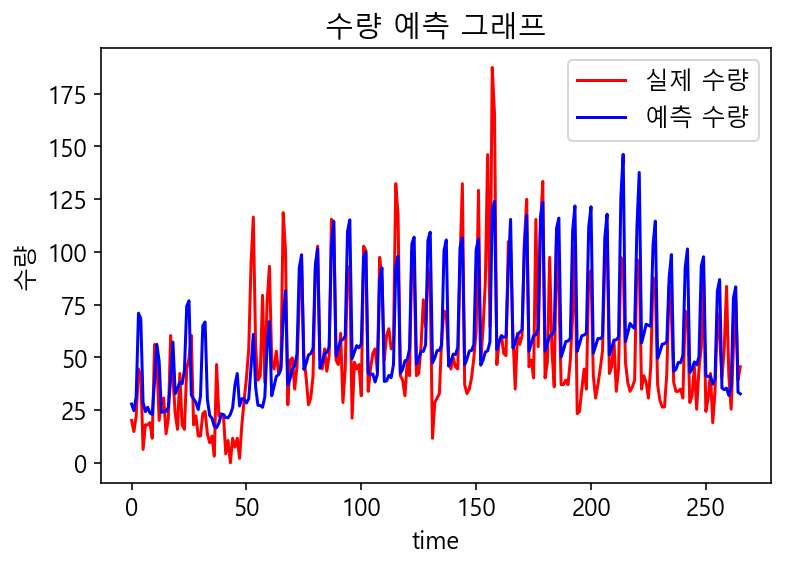

array([[27.880974],
       [24.742542],
       [31.260395],
       [70.944824],
       [68.32236 ],
       [28.673931],
       [24.249792],
       [26.374073],
       [23.587582],
       [22.956175],
       [38.876778],
       [56.182697],
       [48.142105],
       [23.960234],
       [24.170206],
       [24.384764],
       [26.256105],
       [39.727554],
       [57.23913 ],
       [32.739227],
       [35.24594 ],
       [38.184574],
       [37.49044 ],
       [43.705154],
       [74.2262  ],
       [76.823265],
       [32.078957],
       [30.284613],
       [28.605064],
       [25.26495 ]], dtype=float32)

In [152]:
# lstm 수량 예측

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pllt

raw_df=pd.read_csv("./Raw.csv",thousands = ',')
raw_df=raw_df.rename(columns={' 매출':'매출',' 순매출':'순매출',
                                ' 수량':'수량', ' 평균소비자가':'평균소비자가',
                                ' Stores':'Stores', ' SKU':'SKU'})


##### 새로운 변수 추가######

def weekday2(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        if datetime.strptime(f"{i}", "%m/%d/%Y").weekday()>=5:
            list.append(1)
        else:
            list.append(0)
    return list

raw_df['week']=weekday2(raw_df['판매일자'])
# 주말 변수 : 주말 수량, 매출이 평일보다 많음.

# 높은 SKU 변수 : 24이상
highsku=(raw_df['SKU']>=24)
raw_df['highsku']=highsku.astype(int)


def MinMaxScaler1(data):
    # 정규화 코드
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['순매출','수량', '평균소비자가',
              '할인율', 'Stores', 'SKU',
              'week','highsku']] # 이거 갯수=data_size 수

dfx = MinMaxScaler1(dfx)
dfy = dfx[['수량']]      

x = dfx.values.tolist()
y = dfy.values.tolist()



# 데이터셋 준비하기
data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] 
    _y = y[i + window_size]     
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)



# 훈련용데이터셋
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])



#테스트용 데이터셋
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])


window_size = 60 # 학습할 시계열 데이터수(60=60일)
data_size = len(dfx.columns) # 학습에 사용할 변수 갯수


# 모델 생성
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(window_size, data_size)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.fit(train_x, train_y, epochs=200, batch_size=30)
pred_y = model.predict(test_x)


# print('##### Test Result #####')
# print('loss : ',str(loss_and_metrics[0]))
# print('Accuracy : ',str(loss_and_metrics[1]))

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print(f"RMSE 값 : {rmse}")
# sklearn은 mse만 지원하기 때문에 rmse와 rmsle는 직접 만들어야 합니다.
# y_preds는 예측값들이 담긴 데이터, y_test는 실제값 데이터들입니다.


# 역정규화 필요
scale=1/(dfx['수량']/raw_df['수량'])


#print(scale)
#%% 역정규화시켜야함.즉, 원래의 데이터로 만들어야해서
pred_y=pred_y*scale[0]
test_y=test_y*scale[0]
#print(pred_y)
#print(test_y)



# Visualising the results
%matplotlib inline

plt.figure()
pllt.rcParams["font.family"]="Malgun Gothic"
pllt.rcParams["font.size"]=12
pllt.rcParams["figure.figsize"]=(14,4)
mpl.rcParams['axes.unicode_minus']=False

plt.plot(test_y, color='red', label='실제 수량')
plt.plot(pred_y, color='blue', label='예측 수량')
plt.title('수량 예측 그래프')
plt.xlabel('time')
plt.ylabel('수량')
plt.legend()
plt.show()
%config InlineBackend.figure_format = 'retina'


a= pred_y[:30]
a

In [137]:
# len(pred_y) #282
# print(pred_y[:30]) # 1월 1일 수량
# a= pred_y[:30]

In [10]:
#############순매출#################

[[0.28730018801244983, 0.18656716410948984, 0.3067440633242145, 0.06153845207100738, 0.7499999973214285, 0.4999999982142857, 0.0, 0.0], [0.5090144558950855, 0.33955223867927153, 0.32086543535586187, 0.10769229112426291, 0.7499999973214285, 0.6428571405612244, 0.9999999000000099, 0.0], [0.5960501782607655, 0.3880597013477389, 0.29236939313953314, 0.046153839053255534, 0.7499999973214285, 0.7857142829081633, 0.9999999000000099, 0.9999999000000099], [0.21815685387297762, 0.14925373128759187, 0.253488126648809, 0.07692306508875922, 0.7499999973214285, 0.6071428549744898, 0.0, 0.0], [0.2551586403813288, 0.16044776113416126, 0.36195250659592404, 0.06153845207100738, 0.7499999973214285, 0.5357142838010204, 0.0, 0.0], [0.2862977149856054, 0.20522388052043883, 0.27251715039549074, 0.1692307431952703, 0.7499999973214285, 0.46428571262755103, 0.0, 0.0], [0.17004204925770122, 0.1194029850300735, 0.2327493403691475, 0.09230767810651107, 0.7499999973214285, 0.46428571262755103, 0.0, 0.0], [0.2387836

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_119 (LSTM)              (None, 60, 50)            11800     
_________________________________________________________________
dropout_117 (Dropout)        (None, 60, 50)            0         
_________________________________________________________________
lstm_120 (LSTM)              (None, 60, 60)            26640     
_________________________________________________________________
dropout_118 (Dropout)        (None, 60, 60)            0         
_________________________________________________________________
lstm_121 (LSTM)              (None, 60, 80)            45120     
_________________________________________________________________
dropout_119 (Dropout)        (None, 60, 80)            0         
_________________________________________________________________
lstm_122 (LSTM)              (None, 120)             

21/21 [==============================] - 2s 100ms/step - loss: 0.0192 - accuracy: 0.0000e+00
Epoch 64/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0177 - accuracy: 0.0000e+00
Epoch 65/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0179 - accuracy: 0.0000e+00
Epoch 66/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0175 - accuracy: 0.0000e+00
Epoch 67/200
21/21 [==============================] - 2s 101ms/step - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 68/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 69/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 70/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0175 - accuracy: 0.0000e+00
Epoch 71/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 72/200
21/21 [==============================] - 2s 10

21/21 [==============================] - 2s 100ms/step - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 140/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 141/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 142/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 143/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 144/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0098 - accuracy: 0.0000e+00
Epoch 145/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 146/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 147/200
21/21 [==============================] - 2s 100ms/step - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 148/200
21/21 [==============================

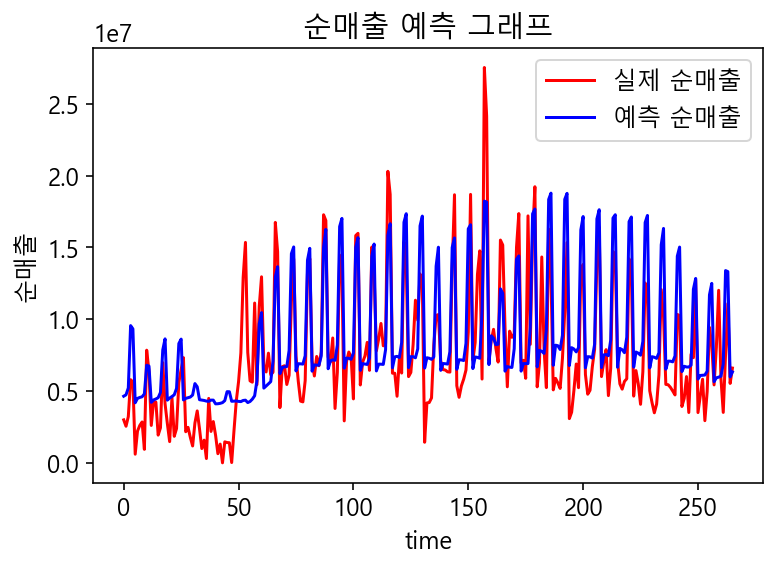

array([[4638671. ],
       [4734664. ],
       [5212505.5],
       [9552360. ],
       [9324679. ],
       [4182374.2],
       [4486645.5],
       [4552771. ],
       [4598015. ],
       [4797781. ],
       [6791886.5],
       [6732978.5],
       [4212572. ],
       [4379215.5],
       [4446124. ],
       [4535960.5],
       [4901674. ],
       [7857169. ],
       [8630038. ],
       [4364041. ],
       [4507974. ],
       [4616282.5],
       [4735797.5],
       [5182009. ],
       [8304749.5],
       [8612712. ],
       [4379259.5],
       [4488430. ],
       [4533024.5],
       [4579864.5]], dtype=float32)

In [158]:
# lstm2 순매출

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pllt

raw_df=pd.read_csv("./Raw.csv",thousands = ',')
raw_df=raw_df.rename(columns={' 매출':'매출',' 순매출':'순매출',
                                ' 수량':'수량', ' 평균소비자가':'평균소비자가',
                                ' Stores':'Stores', ' SKU':'SKU'})

##### 새로운 변수 추가######

def weekday2(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        if datetime.strptime(f"{i}", "%m/%d/%Y").weekday()>=5:
            list.append(1)
        else:
            list.append(0)
    return list

raw_df['week']=weekday2(raw_df['판매일자'])
# 주말 변수 : 주말 수량, 매출이 평일보다 많음.

# 높은 SKU 변수 : 24이상
highsku=(raw_df['SKU']>=24)
raw_df['highsku']=highsku.astype(int)


def MinMaxScaler1(data):
    # 정규화 코드
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['순매출','수량', '평균소비자가',
              '할인율', 'Stores', 'SKU',
              'week','highsku']] # 이거 갯수=data_size 수

dfx = MinMaxScaler1(dfx)
dfy = dfx[['순매출']]      

x = dfx.values.tolist()
y = dfy.values.tolist()



# 데이터셋 준비하기
data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] 
    _y = y[i + window_size]     
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)



# 훈련용데이터셋
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])



#테스트용 데이터셋
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])


window_size = 60 # 학습할 시계열 데이터수(60=60일)
data_size = len(dfx.columns) # 학습에 사용할 변수 갯수


# 모델 생성
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(window_size, data_size)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.fit(train_x, train_y, epochs=200, batch_size=30)
pred_y = model.predict(test_x)


# print('##### Test Result #####')
# print('loss : ',str(loss_and_metrics[0]))
# print('Accuracy : ',str(loss_and_metrics[1]))

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print(f"RMSE 값 : {rmse}")
# sklearn은 mse만 지원하기 때문에 rmse와 rmsle는 직접 만들어야 합니다.
# y_preds는 예측값들이 담긴 데이터, y_test는 실제값 데이터들입니다.


# 역정규화 필요
scale=1/(dfx['순매출']/raw_df['순매출'])


#print(scale)
#%% 역정규화시켜야함.즉, 원래의 데이터로 만들어야해서
pred_y=pred_y*scale[0]
test_y=test_y*scale[0]
#print(pred_y)
#print(test_y)


# Visualising the results
%matplotlib inline

plt.figure()
pllt.rcParams["font.family"]="Malgun Gothic"
pllt.rcParams["font.size"]=12
pllt.rcParams["figure.figsize"]=(14,4)
mpl.rcParams['axes.unicode_minus']=False

plt.plot(test_y, color='red', label='실제 순매출')
plt.plot(pred_y, color='blue', label='예측 순매출')
plt.title('순매출 예측 그래프')
plt.xlabel('time')
plt.ylabel('순매출')
plt.legend()
plt.show()
%config InlineBackend.figure_format = 'retina'


b= pred_y[:30]
b

In [ ]:
len(pred_y) #282
print(pred_y[:30]) # 1월 1일 수량
b= pred_y[:30]

In [12]:
print(raw_df['순매출'].head())
print(dfx[' 순매출'].head())
scale=1/(dfx['순매출']/raw_df['순매출'])
scale[0]

0     2383400
1     5984800
2    12510600
3    10631400
4     5522100
Name:  순매출, dtype: int64
0    0.086595
1    0.227074
2    0.481624
3    0.408322
4    0.209025
Name:  순매출, dtype: float64


27523546.144144256

In [13]:
print(pred_y[:30]) # 1월 달 순매출

[[4392358. ]
 [4266572.5]
 [4364876. ]
 [4544840.5]
 [4863984.5]
 [5257271. ]
 [5273713. ]
 [4163566.8]
 [4238839. ]
 [4462499.5]
 [4771980. ]
 [5255038. ]
 [5592853. ]
 [5583293. ]
 [4315340.5]
 [4608232.5]
 [5027143. ]
 [5204823. ]
 [6581464.5]
 [8326506. ]
 [9604026. ]
 [6260039. ]
 [6655583. ]
 [6843871.5]
 [6086788.5]
 [5133386. ]
 [5465942.5]
 [3916426.2]
 [2768924.5]
 [3922937.8]]


In [14]:
#새로운 시도 (주말의 여부?) 오대박 평일보다 높아

In [19]:

#해당 날짜가 주말이면 1, 평일이면 0
import datetime
import time

def weekday1(a,b,c):
    
    #리스트에 월 ~ 일까지 담아둠
    daylist = ['월', '화', '수', '목', '금', '토', '일']
    #datetime.date(2019,1,20).weekday() 
    #weekday() 라는 메소드의 반환 값은 월요일은 0, 화요일은 1 이므로
    #요일의 값이 리스트의 0번째 값인 daylist[0] = '월' 방식으로 가져온다.
    return daylist[datetime.date(a,b,c).weekday()]

# 사용자에게 입력 받음 
y = int(input("연 : "))
m = int(input("월 : "))
d = int(input("일 : "))

ddd = getDay_c(y,m,d)   # 입력한 날'
print(f"입력 한 {y}.{m}.{d} 는 {ddd}요일 입니다.")



from datetime import datetime
datetime.strptime("2018-01-31", "%Y-%m-%d")


연 : 2017
월 : 6
일 : 3
입력 한 2017.6.3 는 토요일 입니다.


datetime.datetime(2018, 1, 31, 0, 0)

In [28]:
from datetime import datetime
a=datetime.strptime("2021-01-21", "%Y-%m-%d").weekday()
a

3

<AxesSubplot:>

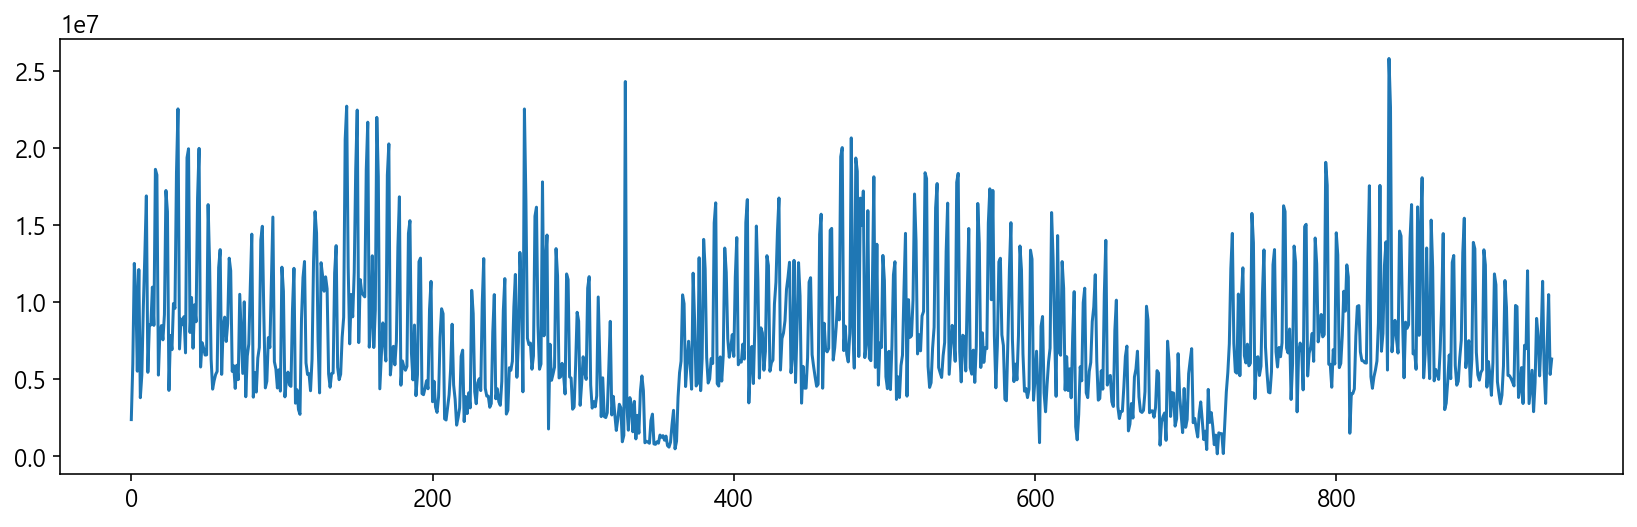

In [45]:
import numpy as np
import pandas as pd

raw_df=pd.read_csv("./Raw.csv",thousands = ',')
raw_df=raw_df.rename(columns={' 매출':'매출',' 순매출':'순매출',
                                ' 수량':'수량', ' 평균소비자가':'평균소비자가',
                                ' Stores':'Stores', ' SKU':'SKU'})
data.head(30)

def weekday2(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        if datetime.strptime(f"{i}", "%m/%d/%Y").weekday()>=5:
            list.append(1)
        else:
            list.append(0)
    return list

raw_df['week']=weekday2(raw_df['판매일자'])
# len(weekday2(raw_df['판매일자']))
raw_df['순매출'].plot()

<AxesSubplot:>

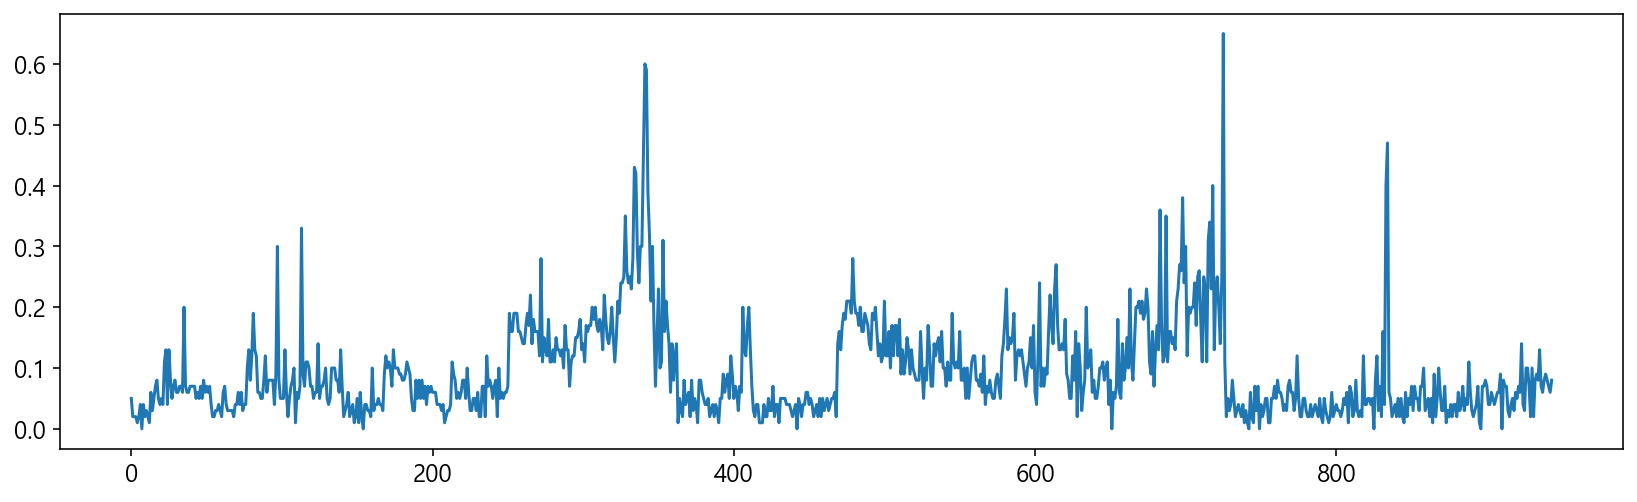

In [48]:
raw_df['할인율'].plot()

<AxesSubplot:>

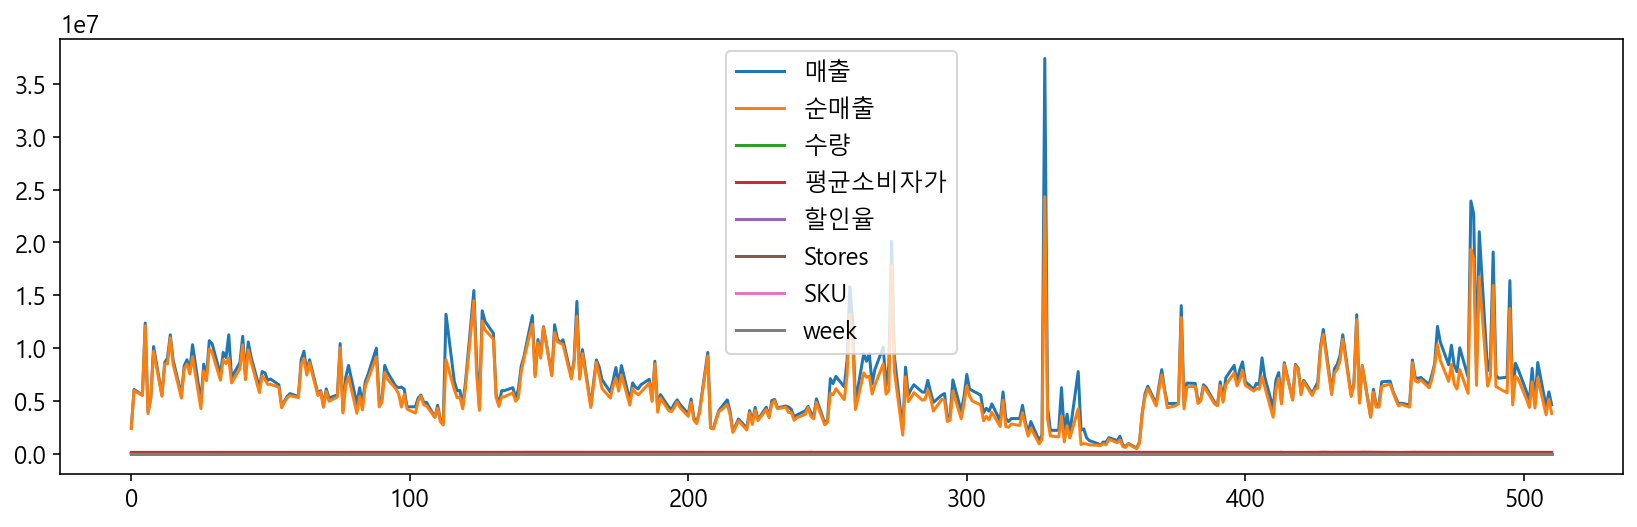

In [80]:
#raw_df['매출'].plot()
raw_df[70:90] # 2017년 8월
raw_df[365+35:365+60] # 2018년 7월
raw_df[750:780] # 2019년 7월
#변수아이디어2 : 썸머위크 (실패..)

# 블랙프라이데이(11월)
raw_df[90+70:90+90] # 2017년 11월
raw_df[130+365+35:130+365+60] # 2018년 11월
raw_df[140+750:140+780] # 2019년 11월

# 변수아이디어3 : 가장 인기가 많다는 리액트 인피니트런 출시일자
# 그러나 첫 출시날짜를 모르겠음....

df=raw_df[raw_df['week']==0]
df.head(365).plot()


In [81]:
# 변수 아이디어4 : 평일 중 가장 괜찮은 요일?
def weekday3(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        list.append(datetime.strptime(f"{i}", "%m/%d/%Y").weekday())
    return list

raw_df['allweek']=weekday3(raw_df['판매일자'])


<AxesSubplot:xlabel='SKU', ylabel='수량'>

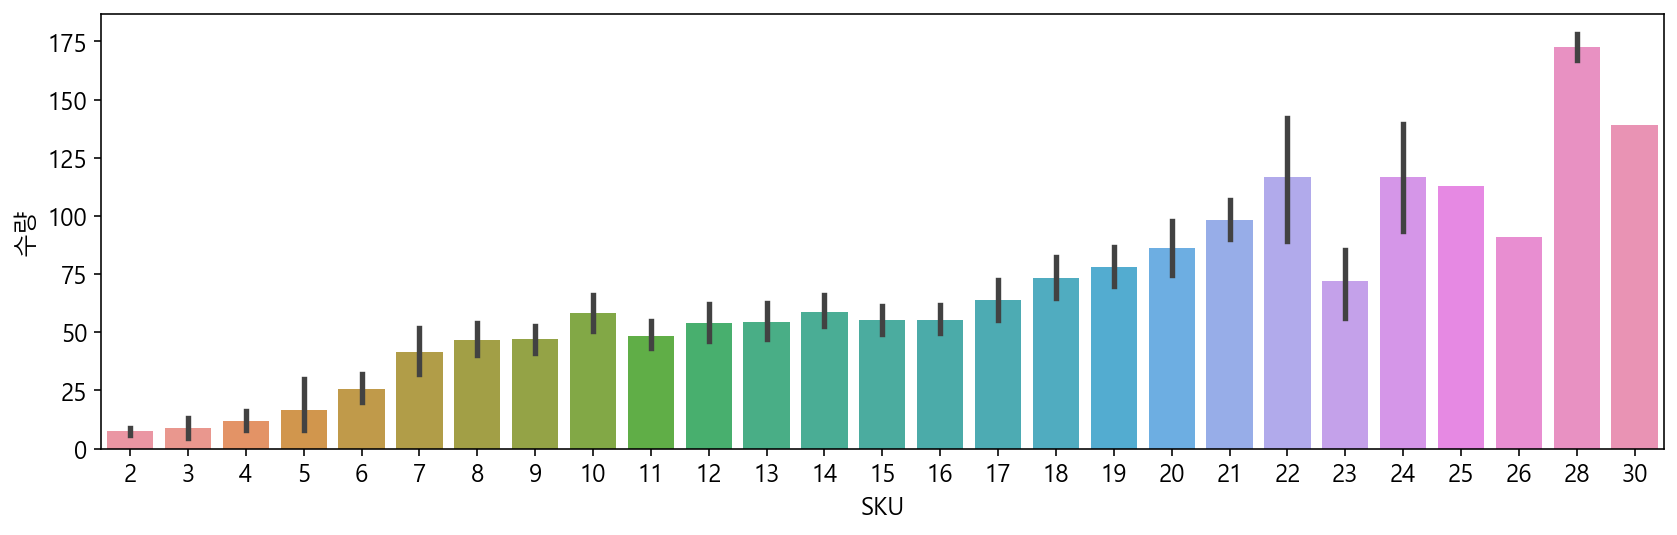

In [102]:
raw_df.groupby('allweek')['순매출'].sum()
raw_df.groupby('allweek')['순매출'].mean()
raw_df.groupby('allweek')['순매출'].max()
raw_df.groupby('allweek')['순매출'].describe()

# raw_df.groupby('allweek')['순매출'].plot()
import seaborn as sns
sns.barplot(x='SKU',y='수량',data=raw_df)

In [100]:
highsku=(raw_df['SKU']>=24)
raw_df['highsku']=highsku.astype(int)

In [101]:
raw_df.head()

,판매일자,매출,순매출,수량,평균소비자가,할인율,Stores,SKU,week,allweek,highsku
0,6/1/2017,2502000,2383400,18,139000,0.05,48,4,0,3,0
1,6/2/2017,6086000,5984800,45,135244,0.02,48,8,0,4,0
2,6/3/2017,12778000,12510600,92,138891,0.02,48,8,1,5,0
3,6/4/2017,10842000,10631400,78,139000,0.02,48,7,1,6,0
4,6/5/2017,5560000,5522100,41,135610,0.01,48,7,0,0,0


<AxesSubplot:xlabel='평균소비자가', ylabel='순매출'>

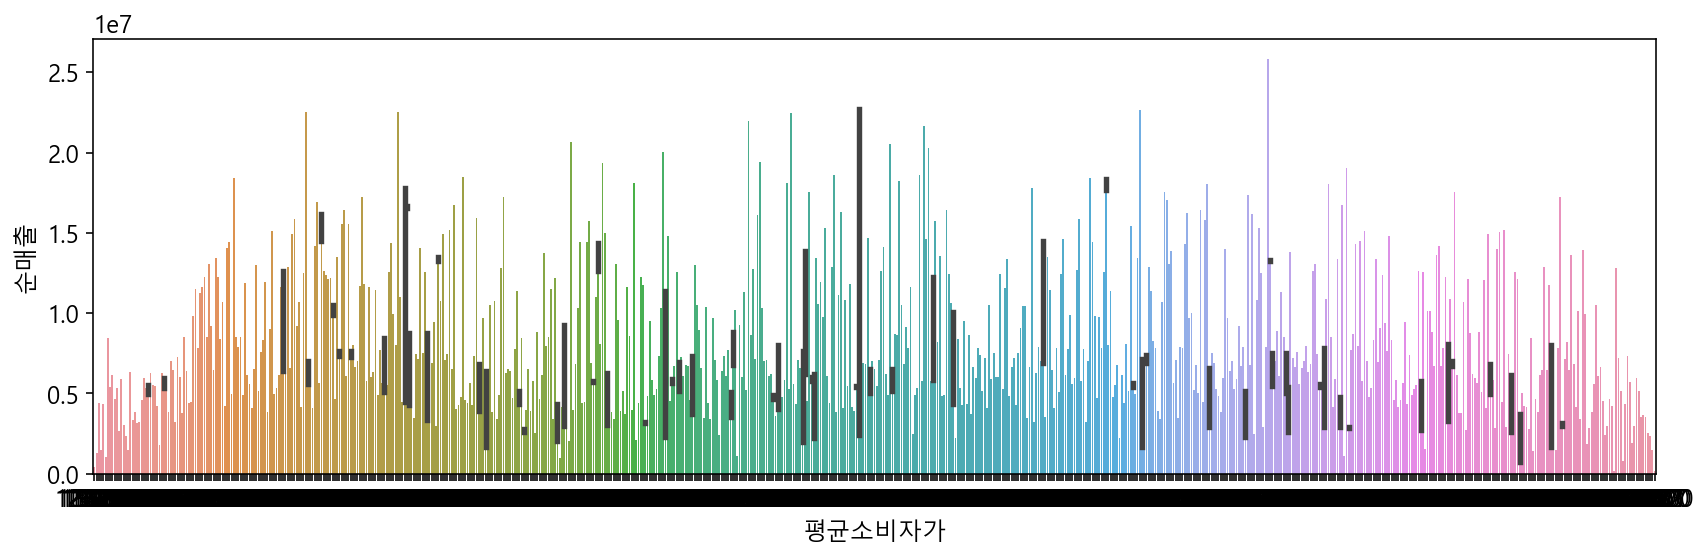

In [98]:
sns.barplot(x='평균소비자가',y='순매출',data=raw_df)

<AxesSubplot:xlabel='Stores', ylabel='순매출'>

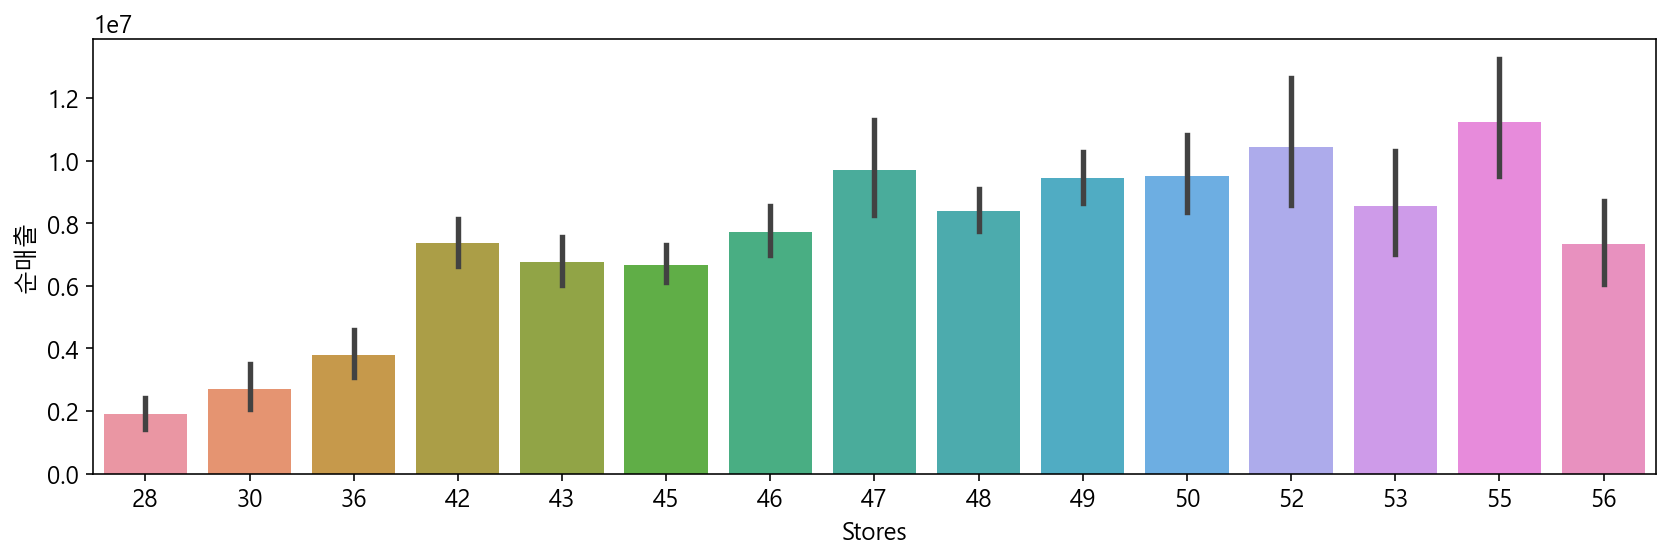

In [121]:
sns.barplot(x='Stores',y='순매출',data=raw_df)

In [ ]:
sns.barplot(x='Stores',y='순매출',data=raw_df)

In [118]:
# 다중공선성과 상관관계는 회귀분석시에만 필요

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pllt

raw_df=pd.read_csv("./Raw.csv",thousands = ',')
raw_df=raw_df.rename(columns={' 매출':'매출',' 순매출':'순매출',
                                ' 수량':'수량', ' 평균소비자가':'평균소비자가',
                                ' Stores':'Stores', ' SKU':'SKU'})

window_size = 7
data_size = 8 # 학습에 사용할 변수 갯수

##### 새로운 변수 추가######

def weekday2(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        if datetime.strptime(f"{i}", "%m/%d/%Y").weekday()>=5:
            list.append(1)
        else:
            list.append(0)
    return list

raw_df['week']=weekday2(raw_df['판매일자'])
# 주말 변수 : 주말 수량, 매출이 평일보다 많음.

# 높은 SKU 변수 : 24이상
highsku=(raw_df['SKU']>=24)
raw_df['highsku']=highsku.astype(int)

# dfx = raw_df[[ '평균소비자가','할인율','week','highsku']]
dfx = raw_df[['수량', '평균소비자가',
              '할인율', 'Stores', 'SKU','week','highsku']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfx.values, i) for i in range(dfx.shape[1])]
vif["features"] = dfx.columns
vif
dfx.corr()

# 다중공선성과 상관관계는 회귀분석시에만 필요

,수량,평균소비자가,할인율,Stores,SKU,week,highsku
수량,1.000000,-0.115553,-0.108244,0.407085,0.447548,0.641934,0.211074
평균소비자가,-0.115553,1.000000,-0.006692,-0.234141,0.372645,0.022557,0.059042
할인율,-0.108244,-0.006692,1.000000,-0.336166,-0.066890,-0.023343,0.040982
Stores,0.407085,-0.234141,-0.336166,1.000000,0.220454,0.019869,0.065085
SKU,0.447548,0.372645,-0.066890,0.220454,1.000000,0.291556,0.296608
week,0.641934,0.022557,-0.023343,0.019869,0.291556,1.000000,0.094791
highsku,0.211074,0.059042,0.040982,0.065085,0.296608,0.094791,1.000000


In [ ]:
dfx = raw_df[['순매출','수량', '평균소비자가',
              '할인율', 'Stores', 'SKU','week','highsku']]
dfx.corr()
# 다중공선성과 상관관계는 회귀분석시에만 필요

In [132]:

dfx = raw_df[['순매출','수량', '평균소비자가',
              '할인율', 'Stores', 'SKU',
              'week','highsku','gaza']] # 이거 갯수=data_size 수
len(dfx.columns)

9

In [184]:
#### 이제 합치기###
# a 와 b,2020년1월 시계열 붙이기

def timestone(tim,num):
    from datetime import date, timedelta
    day=[]
    for i in range(0,num+1):
        d=datetime.strptime(f"{tim}", "%m/%d/%Y") + timedelta(days=i)
        day.append(d)
    return day

timestone("1/1/2020",30)

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 3, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 5, 0, 0),
 datetime.datetime(2020, 1, 6, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 8, 0, 0),
 datetime.datetime(2020, 1, 9, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 12, 0, 0),
 datetime.datetime(2020, 1, 13, 0, 0),
 datetime.datetime(2020, 1, 14, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0),
 datetime.datetime(2020, 1, 16, 0, 0),
 datetime.datetime(2020, 1, 17, 0, 0),
 datetime.datetime(2020, 1, 18, 0, 0),
 datetime.datetime(2020, 1, 19, 0, 0),
 datetime.datetime(2020, 1, 20, 0, 0),
 datetime.datetime(2020, 1, 21, 0, 0),
 datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0,

In [172]:
from datetime import date, timedelta
 
today = date.today()
yesterday = date.today() - timedelta(1)
 
print(today.strftime('%Y-%m-%d'))
print(yesterday.strftime('%Y-%m-%d'))
date.today()

2021-01-23
2021-01-22


datetime.date(2021, 1, 23)